In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from matplotlib.image import imread
from IPython.display import Image
from sklearn.model_selection import train_test_split
import random

DATA_DIR = "../data/"
IMAGE_DIR = DATA_DIR + "cell_images/"
INFECTED = IMAGE_DIR + "Parasitized/"
NOT_INFECTED = IMAGE_DIR + "Uninfected/"

print("Setup all imports and constants")

ModuleNotFoundError: No module named 'pandas'

In [5]:
temp = {
    "Infected": [],
    "Not Infected": [],
    "Image File": [],
    "Image Array": []
}

image_size = (128, 128, 3)

# These are infected confirmed
for infected_file in os.listdir(INFECTED):
    if infected_file == "Thumbs.db":
        continue
    temp["Infected"].append(1)
    temp["Not Infected"].append(0)
    temp["Image File"].append(infected_file)
    temp["Image Array"].append(resize(imread(INFECTED + infected_file), image_size))
    
print("Loaded infected files")

# These are uninfected
for not_infected_file in os.listdir(NOT_INFECTED):
    if not_infected_file == "Thumbs.db":
        continue
    temp["Infected"].append(0)
    temp["Not Infected"].append(1)
    temp["Image File"].append(not_infected_file)
    temp["Image Array"].append(resize(imread(NOT_INFECTED + not_infected_file), image_size))

print("Loaded uninfected files")

Loaded infected files
Loaded uninfected files


In [6]:
df = pd.DataFrame().from_dict(temp)

In [11]:
df["Image Array"].size

27558

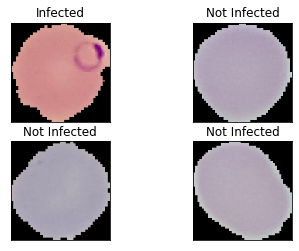

In [41]:
image_datas = df["Image Array"]
i_labels = df["Infected"] 
ni_labels = df["Not Infected"]

a, b, c, d = [random.randint(0, df["Image Array"].size) for i in range(4)]
def find_label(index):
    if i_labels[index]:
        return "Infected"
    elif ni_labels[index]:
        return "Not Infected"
    else:
        return None

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(image_datas[a])
axarr[0,0].set_title(find_label(a))

axarr[0,1].imshow(image_datas[b])
axarr[0,1].set_title(find_label(b))

axarr[1,0].imshow(image_datas[c])
axarr[1,0].set_title(find_label(c))

axarr[1,1].imshow(image_datas[d])
axarr[1,1].set_title(find_label(d))


plt.setp(axarr, xticks=[], yticks=[])
plt.show()

In [52]:
labels = df[df.columns[0:2]].values
images = np.stack(df["Image Array"].values)

In [53]:
print(f"Image Shape: {images.shape}")
print(f"Label Shape: {labels.shape}")

Image Shape: (27558, 128, 128, 3)
Label Shape: (27558, 2)


In [55]:
np.save(DATA_DIR+"images.npy", images)
np.save(DATA_DIR+"labels.npy", labels)
print("Done")

Done
